Trong notebook này, ta sẽ làm quen với:
- Mạng Lenet, một model dùng cho xử lý ảnh được phát triển bởi Yann Lecun
- Kiến trúc Convolution trong Deep Learning

In [1]:
# import the necessary packages
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np

import matplotlib.pyplot as plt

1.1. Thiết lập các tham số huấn luyện

- NB_EPOCH = 10
- BATCH_SIZE = 128
- VERBOSE = 1
- OPTIMIZER = Adam()
- VALIDATION_SPLIT=0.2
- IMG_ROWS, IMG_COLS = 28
- NB_CLASSES  = 10
- INPUT SHAPE = (1, 28, 28)

In [3]:
np.random.seed(1671)

# YOUR CODE HERE
NB_EPOCH = 10
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 28, 28
NB_CLASSES = 10
INPUT_SHAPE = (1, 28, 28)
# YOUR CODE HERE

1.2. Chuẩn bị dữ liệu

Load dataset bằng hàm mnist.load_data và đổi data_format về channels_first

In [22]:
# YOUR CODE HERE
dataset = mnist.load_data("mnist.npz")
K.set_image_data_format("channels_first")
# YOUR CODE HERE

1.3. Chuẩn hóa dữ liệu đầu vào, ta làm những việc sau:
- Đưa ma trận dữ liệu về kiểu float32
- Đưa giá trị pixel ảnh về miền (0,1)
- Chuyển giá trị dữ liệu về shape (:, 1, 28, 28)

In [55]:
# YOUR CODE HERE
print(dataset[0][0].shape)
print(dataset[1][0].shape)

x_train = dataset[0][0].astype("float32")
x_test = dataset[1][0].astype("float32")
x_train /= 255
x_test /= 255


x_train: np = x_train.reshape(-1, 1, 28, 28)
x_test: np = x_test.reshape(-1, 1, 28, 28)
# YOUR CODE HERE

print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

(60000, 28, 28)
(10000, 28, 28)
60000 train samples
10000 test samples


1.4. Biến đổi dữ liệu đầu ra thành dạng One-hot Vector với độ dài vector = NB_CLASSES

In [64]:
# YOUR CODE HERE
y_train = np_utils.to_categorical(dataset[0][1], num_classes=NB_CLASSES, dtype="int8")
y_test = np_utils.to_categorical(dataset[1][1], num_classes=NB_CLASSES, dtype="int8")
# YOUR CODE HERE

print(x_train.shape)

(60000, 1, 28, 28)


1.5. Xây dựng mô hình với kiến trúc như sau:

- Conv2D(20, kernel_size=5, padding="same",input_shape=input_shape)
- Activation("relu")
- MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
- Conv2D(50, kernel_size=5, padding="same")
- Activation("relu")
- MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
- Flatten()
- Dense(500)
- Activation("relu")
- Dense(NB_CLASSES)
- Activation("softmax")

In [ ]:
# YOUR CODE HERE
model = None
# YOUR CODE HERE

1.6. Compile model với các tham số sau:
- loss="categorical_crossentropy"
- optimizer=OPTIMIZER
- metrics=["accuracy"]

In [ ]:
print(x_train.shape)
print(y_train.shape)

# YOUR CODE HERE
None
# YOUR CODE HERE

(60000, 1, 28, 28)
(60000, 10)


1.7. Huấn luyện mô hình với các tham số sau:
- batch_size=BATCH_SIZE
- epochs=NB_EPOCH
- verbose=VERBOSE
- validation_split=VALIDATION_SPLIT

In [ ]:
# YOUR CODE HERE
history =None
# YOUR CODE HERE

Epoch 1/10
375/375 [==============================] - 10s 7ms/step - loss: 0.4255 - accuracy: 0.8667 - val_loss: 0.0539 - val_accuracy: 0.9844
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0519 - accuracy: 0.9840 - val_loss: 0.0439 - val_accuracy: 0.9881
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0307 - accuracy: 0.9906 - val_loss: 0.0388 - val_accuracy: 0.9883
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0343 - val_accuracy: 0.9892
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0329 - val_accuracy: 0.9902
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0133 - accuracy: 0.9961 - val_loss: 0.0404 - val_accuracy: 0.9893
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0084 - accuracy: 0.9969 - val_loss: 0.0414 - val_accuracy: 0.9890
Epoch

1.8. Huấn luyện mô hình dùng phương thức evaluate

In [ ]:
# YOUR CODE HERE
score =None
# YOUR CODE HERE
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0331 - accuracy: 0.9919

Test score: 0.03306254372000694
Test accuracy: 0.9919000267982483


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


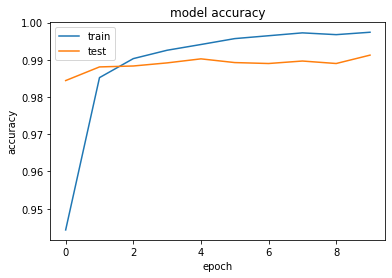

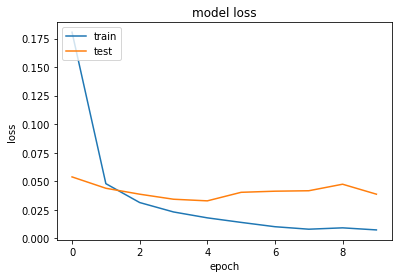

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
from keras.models import load_model
model.save('models/lenet_model.h5')  # creates a HDF5 file 'my_model.h5'
del model